<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/imdb2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
1/8.18605127e-04

1221.5901990069017

In [2]:
1/0.1

10.0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb

In [6]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=20000)

In [10]:
x_train[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
x_train = pad_sequences(x_train, maxlen = 100)
x_test = pad_sequences(x_test, maxlen=100)

In [17]:
x_train.shape

(25000, 100)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [19]:
vocab_size = 20000
embed_size = 128

In [20]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (x_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 46s 233ms/step - loss: 0.4360 - accuracy: 0.7888 - val_loss: 0.3373 - val_accuracy: 0.8517
Epoch 2/5
196/196 [==============================] - 46s 233ms/step - loss: 0.2282 - accuracy: 0.9115 - val_loss: 0.3722 - val_accuracy: 0.8448
Epoch 3/5
196/196 [==============================] - 45s 231ms/step - loss: 0.1499 - accuracy: 0.9456 - val_loss: 0.3837 - val_accuracy: 0.8405
Epoch 4/5
196/196 [==============================] - 45s 228ms/step - loss: 0.0974 - accuracy: 0.9670 - val_loss: 0.5948 - val_accuracy: 0.8284
Epoch 5/5
196/196 [==============================] - 45s 227ms/step - loss: 0.0637 - accuracy: 0.9786 - val_loss: 0.6410 - val_accuracy: 0.8263


In [23]:
history.history

{'accuracy': [0.7888000011444092,
  0.9115200042724609,
  0.9455599784851074,
  0.9670400023460388,
  0.9785599708557129],
 'loss': [0.4359685182571411,
  0.2281854897737503,
  0.14989009499549866,
  0.09739327430725098,
  0.0636727511882782],
 'val_accuracy': [0.8516799807548523,
  0.844760000705719,
  0.8405200242996216,
  0.8283600211143494,
  0.8262799978256226],
 'val_loss': [0.3372969627380371,
  0.37222960591316223,
  0.3836779296398163,
  0.5948055386543274,
  0.641011118888855]}

In [25]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

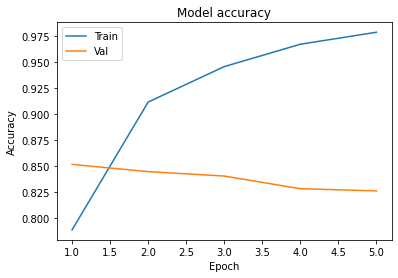

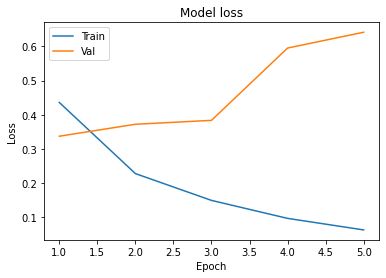

In [26]:
plot_learningCurve(history, 5)